## **An Exploration into Montgomery County Crash Data**
Authors: Vighnesh Prabhu, Joshua Gonzales

Introduction: 
>Between 2015 and 2021, there have been 131,610 recorded accidents in Montgomery County. In this report, we want to gain a better insight into the reasons and nature of these accidents. We plan on achieving this goal by conducting an intitial exploration into some of the more interesting features in the data. Once we have delevoped a few hypotheses we will build visualiztions to determine the outcome of them. We hope that these new insights will work to reduce the number and severity of accidents.

>The dataset we are using contains information regarding traffic collisions within Montgomery County. The data was collected using the Automated Crash Reporting System of the Maryland State Police. The collision reports contained within this data are based on preliminary information given by reporting parties. Thus, we can expect some degree of error in how the data was recorded. We plan on addressing this issue in our data cleaning and preprocessing section. 








#Initial Data Exploration:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Kratosmsn11/data_science_project_1/main/Crash_Reporting_-_Drivers_Data.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Below, we have a list of the features contained in the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131610 entries, 0 to 131609
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Report Number                   131610 non-null  object 
 1   Local Case Number               131610 non-null  object 
 2   Agency Name                     131610 non-null  object 
 3   ACRS Report Type                131610 non-null  object 
 4   Crash Date/Time                 131610 non-null  object 
 5   Route Type                      118773 non-null  object 
 6   Road Name                       119448 non-null  object 
 7   Cross-Street Type               118761 non-null  object 
 8   Cross-Street Name               119443 non-null  object 
 9   Off-Road Description            12161 non-null   object 
 10  Municipality                    14464 non-null   object 
 11  Related Non-Motorist            4089 non-null    object 
 12  Collision Type  

In [ ]:
df.head()

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,Municipality,Related Non-Motorist,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Non-Motorist Substance Abuse,Person ID,Driver At Fault,Injury Severity,Circumstance,Driver Distracted By,Drivers License State,Vehicle ID,Vehicle Damage Extent,Vehicle First Impact Location,Vehicle Second Impact Location,Vehicle Body Type,Vehicle Movement,Vehicle Continuing Dir,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location
0,DD5620004G,190046109,Rockville Police Departme,Property Damage Crash,09/26/2019 07:20:00 AM,NaN,NaN,NaN,NaN,PARKING LOT,NaN,NaN,SINGLE VEHICLE,CLEAR,NaN,DAYLIGHT,NaN,NONE DETECTED,NaN,6558DDB6-C713-4B50-9CDD-4A265FE507B9,Yes,NO APPARENT INJURY,NaN,NOT DISTRACTED,MD,940390C5-2D67-4B95-BCE3-FDF38AA42ECD,SUPERFICIAL,TWELVE OCLOCK,TWELVE OCLOCK,SCHOOL BUS,OTHER,South,South,15,No,No,2017,THOMAS,BUS,NO MISUSE,39.103518,-77.157669,"(39.10351817, -77.15766933)"
1,MCP29620057,200023865,Montgomery County Police,Property Damage Crash,06/18/2020 02:00:00 AM,County,DAIRYMAID DR,County,METZ DR,NaN,NaN,NaN,OTHER,CLOUDY,DRY,UNKNOWN,NaN,UNKNOWN,NaN,7A8F59F9-9886-4D41-B72C-0043BC462A05,Yes,NO APPARENT INJURY,NaN,UNKNOWN,XX,796D6E97-FC6F-4CB5-BCC0-E77F10D6220D,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,Unknown,Unknown,35,No,No,2020,UNK,UNK,UNKNOWN,39.154847,-77.271245,"(39.15484667, -77.271245)"
2,MCP3050004K,200016465,Montgomery County Police,Property Damage Crash,04/19/2020 03:39:00 PM,County,RUSSETT RD,County,ARCTIC AVE,NaN,NaN,NaN,OTHER,CLEAR,DRY,DAYLIGHT,NO CONTROLS,ALCOHOL PRESENT,NaN,193D33B6-4BAB-4A82-A4E7-CE35BA3B28F1,Yes,NO APPARENT INJURY,NaN,UNKNOWN,MD,06DEBB17-3C98-421B-A368-8578A48773B2,DISABLING,TWELVE OCLOCK,FOUR OCLOCK,VAN,ACCELERATING,East,East,25,No,No,2004,DODGE,GRAND CARAVAN,NO MISUSE,39.080062,-77.097845,"(39.08006167, -77.097845)"
3,MCP2641001J,200016526,Montgomery County Police,Injury Crash,04/20/2020 09:15:00 AM,County,ARCHDALE RD,County,GUNNERS BRANCH RD,NaN,NaN,NaN,OTHER,CLOUDY,DRY,DAYLIGHT,NO CONTROLS,NONE DETECTED,NaN,5E259E14-1216-4388-87FB-925035107021,Yes,POSSIBLE INJURY,NaN,UNKNOWN,MD,5146C181-7BFF-41CB-ADB8-8AFECD67FCD1,DISABLING,ELEVEN OCLOCK,ELEVEN OCLOCK,PASSENGER CAR,UNKNOWN,North,North,25,No,No,2006,HONDA,CR-V,UNKNOWN,39.175230,-77.241090,"(39.17523, -77.24109)"
4,MCP27100039,200016305,Montgomery County Police,Property Damage Crash,04/17/2020 05:00:00 PM,Municipality,E DIAMOND AVE,Municipality,S SUMMIT AVE,NaN,GAITHERSBURG,NaN,SAME DIR REAR END,NaN,DRY,DAYLIGHT,STOP SIGN,NONE DETECTED,NaN,0F7ECAF5-441D-44C3-B48F-7B00DCCAD53D,No,NO APPARENT INJURY,NaN,NOT DISTRACTED,MD,828900BA-816A-4464-8DD3-2291E72DD1FC,SUPERFICIAL,SIX OCLOCK,SIX OCLOCK,PASSENGER CAR,STOPPED IN TRAFFIC LANE,North,North,25,No,No,2011,TOYOTA,4S,NaN,39.140555,-77.193347,"(39.140555, -77.19334667)"


 Below we have displayed the number of unique values for each feature in the dataframe.  





In [ ]:
df.nunique()

Report Number                      73855
Local Case Number                  76585
Agency Name                           10
ACRS Report Type                       3
Crash Date/Time                    72052
Route Type                            10
Road Name                           3317
Cross-Street Type                     10
Cross-Street Name                   6023
Off-Road Description                8764
Municipality                          20
Related Non-Motorist                  11
Collision Type                        18
Weather                               12
Surface Condition                     11
Light                                  8
Traffic Control                       11
Driver Substance Abuse                11
Non-Motorist Substance Abuse          13
Person ID                         131610
Driver At Fault                        3
Injury Severity                        5
Circumstance                         181
Driver Distracted By                  19
Drivers License 

We are now begining our intial exploration into the individual features that we have found to be the most interesting. Those variables being Injury Severity, Light, Weather, and Vehicle Damage Extent.

To begin our exploration, we are going to look at 'Injury Severity'. We are doing this in order to see the distrbution of accidents for each injury type. 

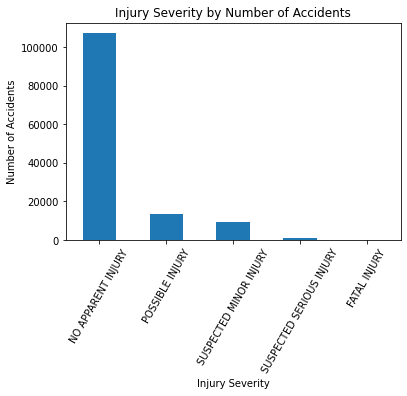

In [ ]:
df['Injury Severity'].value_counts().plot.bar()
plt.xticks(rotation= 60)
plt.xlabel('Injury Severity')
plt.ylabel('Number of Accidents')
plt.title('Injury Severity by Number of Accidents');

Based on the the graph above, we can see that the data is heavely skewed towards 'NO APPARENT INJURY'. 

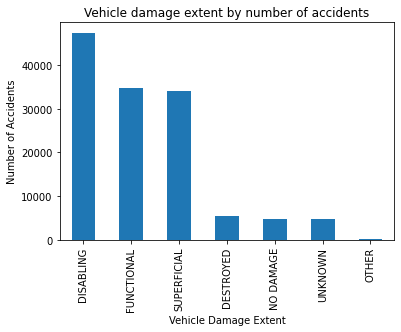

In [ ]:
df['Vehicle Damage Extent'].value_counts().plot.bar()
plt.title('Vehicle damage extent by number of accidents')
plt.ylabel('Number of Accidents')
plt.xlabel('Vehicle Damage Extent');

Above is the graph of Vehicle damage extent by number of accidents. 

On comparing the two graphs above, we think there is a relationship between vehicle damage extent and the injury severity.

We are now going examine the 'Weather' feature.

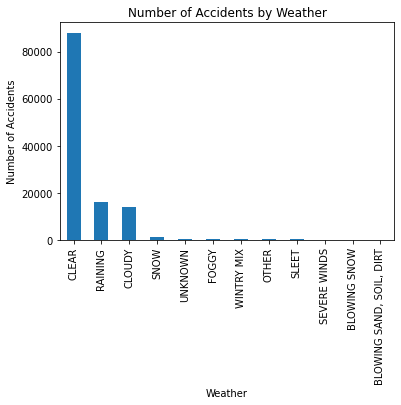

In [ ]:
df['Weather'].value_counts().plot.bar()
plt.title('Number of Accidents by Weather')
plt.xlabel('Weather')
plt.ylabel('Number of Accidents');

Does Weather impact Injury Severity?

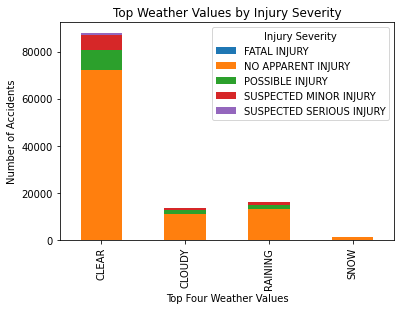

In [ ]:
df_w= df[ (df['Weather'] == 'CLEAR') | (df['Weather'] == 'CLOUDY') | (df['Weather'] == 'RAINING') | (df['Weather'] == 'SNOW') ]
pd.crosstab(df_w['Weather'], df_w['Injury Severity']).plot.bar(stacked= True)
plt.title('Top Weather Values by Injury Severity')
plt.ylabel('Number of Accidents')
plt.xlabel('Top Four Weather Values');

Weather does not directly impact Injury Severity.

We are examing the data of Light feature, to see if anything interesting appears. 


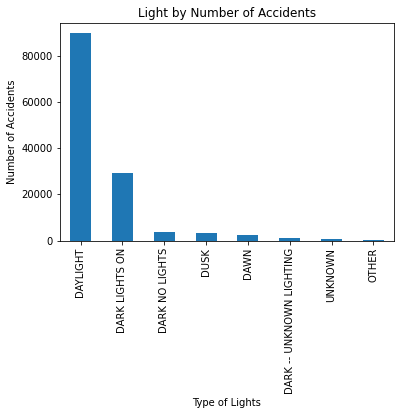

In [ ]:
df['Light'].value_counts().plot.bar()
plt.title('Light by Number of Accidents')
plt.ylabel('Number of Accidents')
plt.xlabel('Type of Lights');

We are now going to create a new column in the data to represent the hour of day. In order to investigate, the amount of accidents that occur by hour of day.

In [ ]:
df.index = pd.to_datetime(df['Crash Date/Time'])
df = df.sort_index()
df['hour'] = df.index.hour

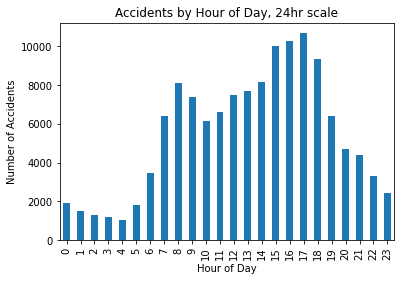

In [ ]:
df['hour'].value_counts().sort_index().plot.bar() 
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Hour of Day, 24hr scale');

Examing this plot, it is clear that there are two peaks present in the data. These peaks are located at the hours between 7AM-9AM and 3PM-6PM. This leads us to believe that these times are the busiest hours of the day. 

By applying general logic, we can assume this is caused by the popular commuting times. 

This is an interesting feature, we plan on investigating this further in our section on data visualization and exploration.

After examining the hour feature, now we want to look at a new feature that is collision type.

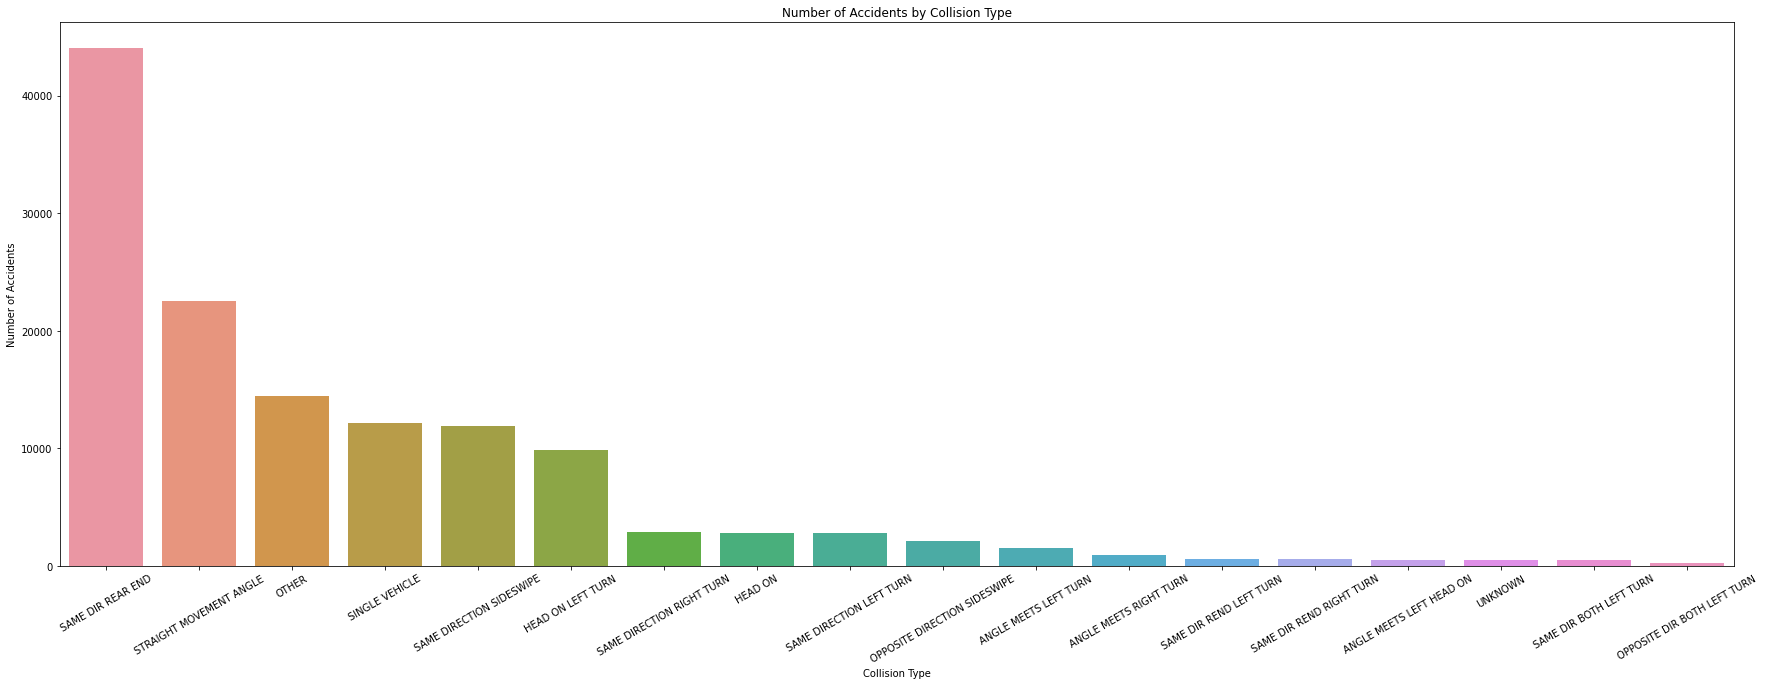

In [ ]:
plt.figure(figsize=(30, 10))
sns.countplot(x= 'Collision Type', data= df, order= df['Collision Type'].value_counts().index)
plt.xticks(rotation=30)
plt.title('Number of Accidents by Collision Type')
plt.ylabel('Number of Accidents')
plt.xlabel('Collision Type');

Based on the graph above, we can see that the data is highly skewed towards the "Same direction rear end" collision type. We can also see that the majority of the data is represented by only a handful of collisions types. The most popular collision types are, 'Straight Movement Angle', 'Other', 'Single Vehicle', 'Same Direction Sideswipe', and 'Head on Left Turn'. 

Upon further investigation into the data, we are going to take a look at Traffic Control, Cross Street Type and Cross Street Name.

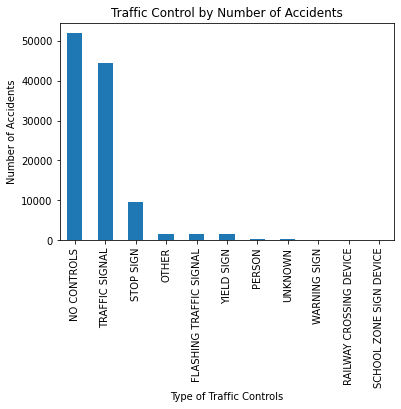

In [ ]:
df['Traffic Control'].value_counts().plot.bar()
plt.title('Traffic Control by Number of Accidents')
plt.ylabel('Number of Accidents')
plt.xlabel('Type of Traffic Controls');

Based on the graph above, we can see that the majority of the crashes occur in areas where there are no controls. This lead us to examine the street names in order to find out if streets with no controls incur more accidents.

Below is the gragh for number of accidents by Road name.

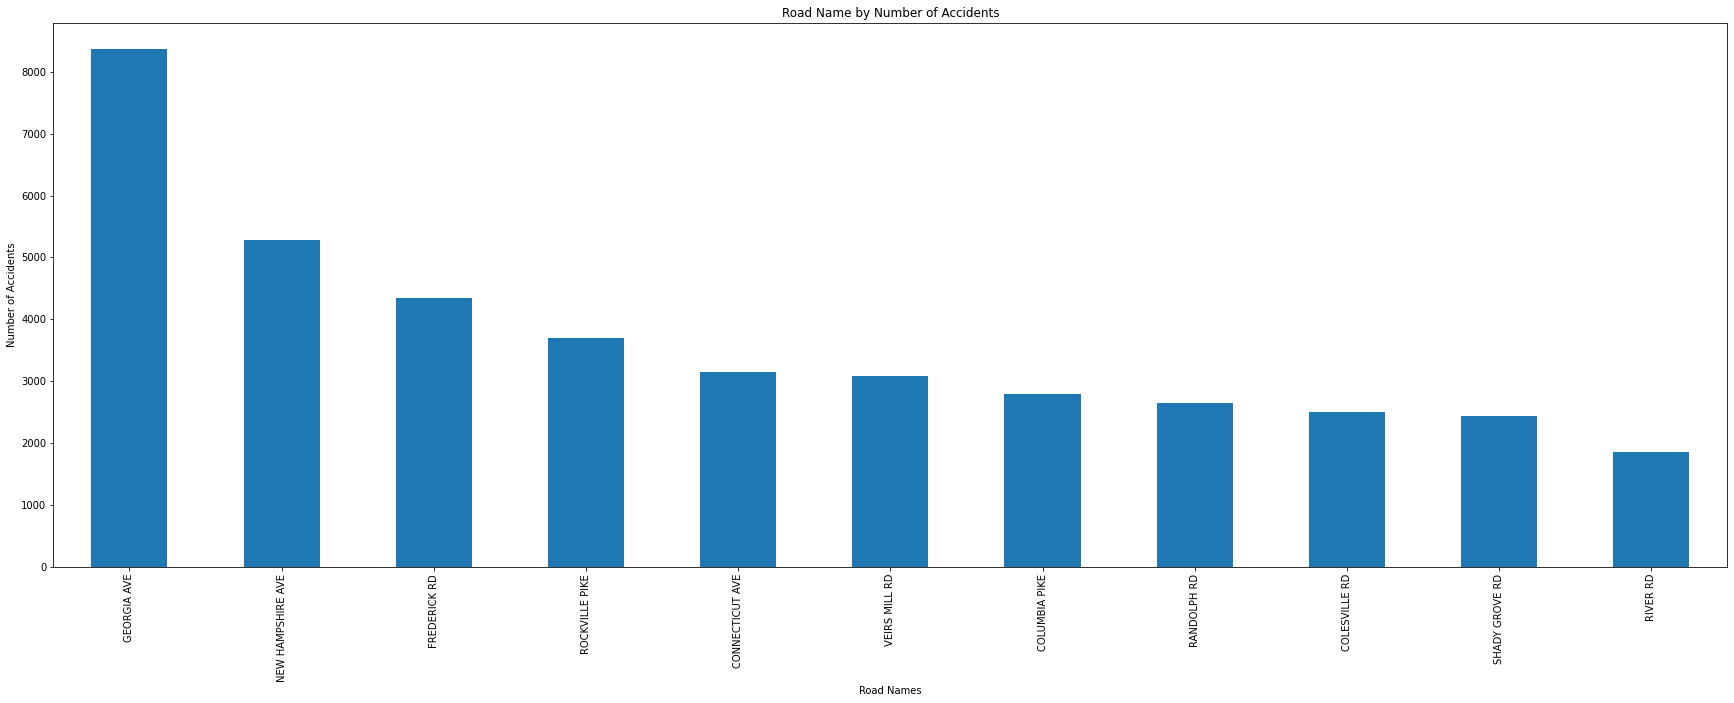

In [ ]:
df['Road Name'].value_counts()[:11].plot.bar(figsize= (30,10))
plt.title('Road Name by Number of Accidents')
plt.ylabel('Number of Accidents')
plt.xlabel('Road Names');

The road name data may by more valuable, if we compare it with traffic control in our data visualiztion section.

Below we have a graph of the number of accidents for the top 12 Vehicle Body Types. The data is skewed towards passenger cars, but we are curious what kind of collision types are incured for each body type. We will investigate this further in our data visualiztion section.

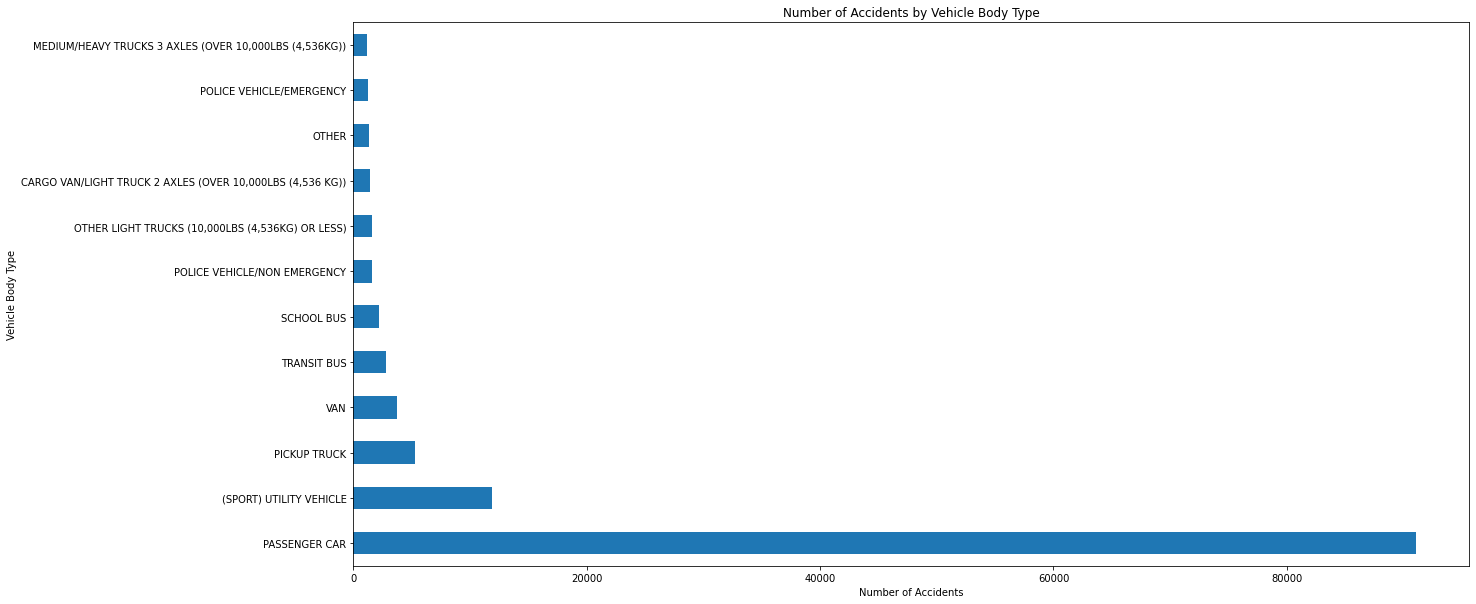

In [ ]:
df['Vehicle Body Type'].value_counts()[:12].plot.barh(figsize=(20,10))
plt.title('Number of Accidents by Vehicle Body Type')
plt.ylabel('Vehicle Body Type')
plt.xlabel('Number of Accidents');

# Data Cleaning and Preprocessing:

Below we have  data columns listed highest perecent of NA values.

In [ ]:
df.isna().mean().sort_values(ascending= False)

Non-Motorist Substance Abuse      0.975382
Related Non-Motorist              0.968931
Off-Road Description              0.907598
Municipality                      0.890100
Circumstance                      0.810865
Equipment Problems                0.213251
Driver Substance Abuse            0.182273
Traffic Control                   0.155619
Surface Condition                 0.117765
Cross-Street Type                 0.097629
Route Type                        0.097538
Cross-Street Name                 0.092447
Road Name                         0.092409
Weather                           0.078634
Drivers License State             0.051227
Vehicle Continuing Dir            0.015143
Vehicle Going Dir                 0.015143
Vehicle Body Type                 0.014710
Light                             0.008404
Collision Type                    0.003298
Vehicle Movement                  0.002059
Vehicle Second Impact Location    0.001945
Vehicle Damage Extent             0.001816
Vehicle Fir

We are dropping any columns that hove 80% or more NA values. Since we have converted our index into a Timestamp, we also no longer need the column 'Crash Date/Time'. 'df1' will be our first copy of the original dataframe 'df.

In [ ]:
df1 = df
df1= df1.drop(['Non-Motorist Substance Abuse', 'Related Non-Motorist', 'Municipality', 'Circumstance', 'Off-Road Description','Crash Date/Time'], axis=1)

We are now going to drop any columns in 'df1' with identifiaction values, since we are not concerned with personal Identifiers.



In [ ]:
df1= df1.drop(['Person ID', 'Vehicle ID','Agency Name','Report Number','Local Case Number'], axis=1)

In [ ]:
df1.isna().sum()

ACRS Report Type                      0
Route Type                        12837
Road Name                         12162
Cross-Street Type                 12849
Cross-Street Name                 12167
Collision Type                      434
Weather                           10349
Surface Condition                 15499
Light                              1106
Traffic Control                   20481
Driver Substance Abuse            23989
Driver At Fault                       0
Injury Severity                       0
Driver Distracted By                  0
Drivers License State              6742
Vehicle Damage Extent               239
Vehicle First Impact Location       156
Vehicle Second Impact Location      256
Vehicle Body Type                  1936
Vehicle Movement                    271
Vehicle Continuing Dir             1993
Vehicle Going Dir                  1993
Speed Limit                           0
Driverless Vehicle                    0
Parked Vehicle                        0


Now, we are going check for NA values in the features we plan on using.

In [ ]:
df1= df1[df1['Collision Type'].notna()]

In [ ]:
df1['Driver Substance Abuse'].isna().sum()

23863

In [ ]:
df1['Vehicle Year'].isna().sum()

0

In [ ]:
df1['Injury Severity'].isna().sum()

0

In [ ]:
df1= df1[df1['Vehicle Damage Extent'].notna()]

In [ ]:
df1['Road Name'].isna().sum()

11976

In [ ]:
df1['Traffic Control'].isna().sum()

20292

In [ ]:
df1= df1[df1['Vehicle Body Type'].notna()]

In [ ]:
df1['Drivers License State'].isna().sum()

4904

In [ ]:
df1['Driver At Fault'].isna().sum()

0

We are going to ignore the NA values in 'Traffic Control', 'Road Name', 'Driver Substance Abuse' and 'Drivers License State'. Since dropping them would remove a large amount of our data.

Now we are going to look for any empty strings that are not NA's.

In [ ]:
(df1.select_dtypes(include='object') == "").sum()

ACRS Report Type                  0
Route Type                        0
Road Name                         0
Cross-Street Type                 0
Cross-Street Name                 0
Collision Type                    0
Weather                           0
Surface Condition                 0
Light                             0
Traffic Control                   0
Driver Substance Abuse            0
Driver At Fault                   0
Injury Severity                   0
Driver Distracted By              0
Drivers License State             0
Vehicle Damage Extent             0
Vehicle First Impact Location     0
Vehicle Second Impact Location    0
Vehicle Body Type                 0
Vehicle Movement                  0
Vehicle Continuing Dir            0
Vehicle Going Dir                 0
Driverless Vehicle                0
Parked Vehicle                    0
Vehicle Make                      0
Vehicle Model                     0
Equipment Problems                0
Location                    

In [ ]:
(df1.select_dtypes(include='object') == "UNKNOWN").sum()

ACRS Report Type                      0
Route Type                            0
Road Name                             0
Cross-Street Type                     0
Cross-Street Name                     0
Collision Type                      402
Weather                             438
Surface Condition                   339
Light                               404
Traffic Control                     191
Driver Substance Abuse             7122
Driver At Fault                       0
Injury Severity                       0
Driver Distracted By              22444
Drivers License State                 0
Vehicle Damage Extent              3507
Vehicle First Impact Location      1565
Vehicle Second Impact Location     1547
Vehicle Body Type                   704
Vehicle Movement                   1613
Vehicle Continuing Dir                0
Vehicle Going Dir                     0
Driverless Vehicle                    0
Parked Vehicle                        0
Vehicle Make                        833


In [ ]:
(df1.select_dtypes(include='object') == "OTHER").sum()

ACRS Report Type                      0
Route Type                            0
Road Name                             0
Cross-Street Type                     0
Cross-Street Name                     0
Collision Type                    13955
Weather                             279
Surface Condition                   142
Light                               259
Traffic Control                    1531
Driver Substance Abuse               46
Driver At Fault                       0
Injury Severity                       0
Driver Distracted By                  0
Drivers License State                 0
Vehicle Damage Extent                75
Vehicle First Impact Location         0
Vehicle Second Impact Location        0
Vehicle Body Type                  1358
Vehicle Movement                    668
Vehicle Continuing Dir                0
Vehicle Going Dir                     0
Driverless Vehicle                    0
Parked Vehicle                        0
Vehicle Make                          5


Upon examination, we found no empty strings. There are a few columns with high numbers of 'UNKNOWN' and 'OTHER' values. We are going to leave these values as it is, since we are not sure exactly which values they might represent.  

# Data Exploration and Visualization:

## Case 1- What types of collisions occur throughout the day?

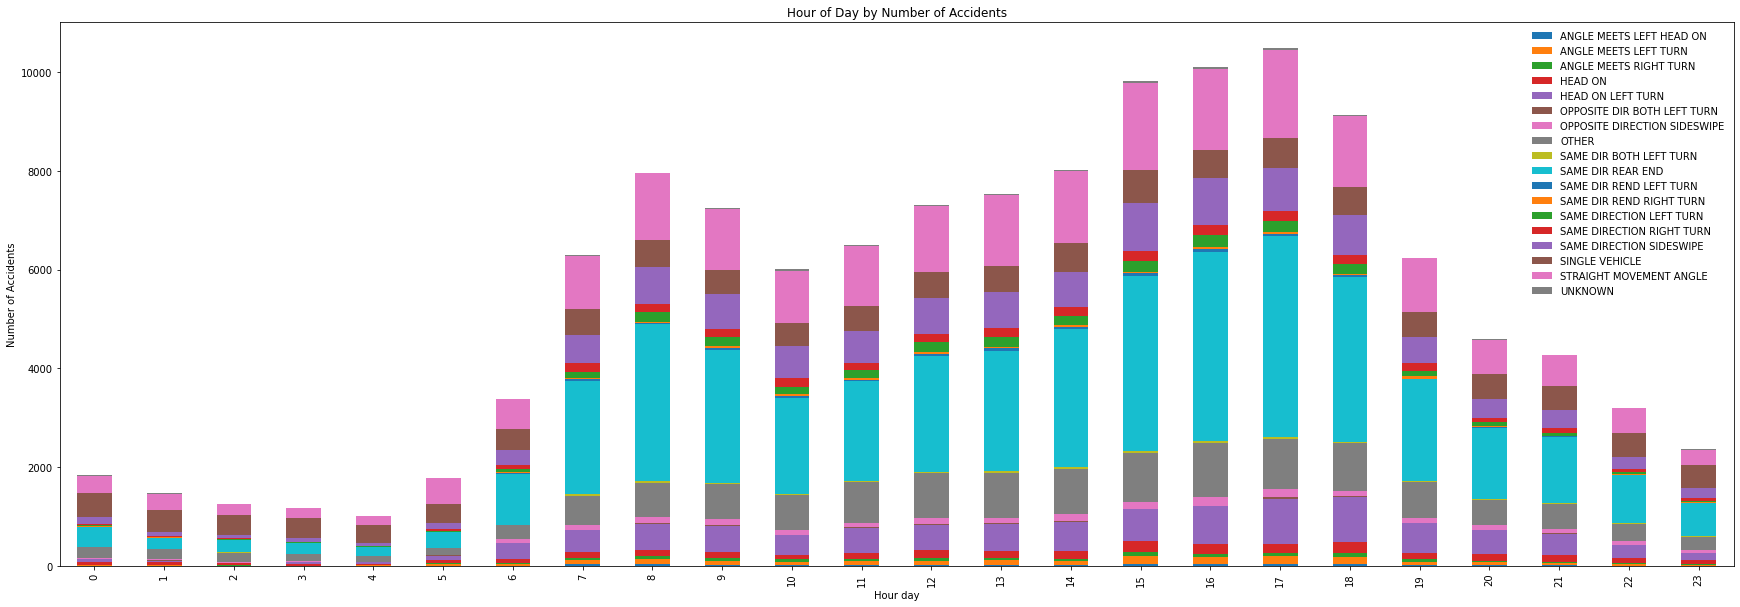

In [ ]:
pd.crosstab(df1['hour'], df1['Collision Type']).plot.bar(stacked= True, figsize= (30,10))
plt.legend(framealpha= 0.0)
plt.xlabel('Hour day')
plt.ylabel('Number of Accidents')
plt.title('Hour of Day by Number of Accidents');

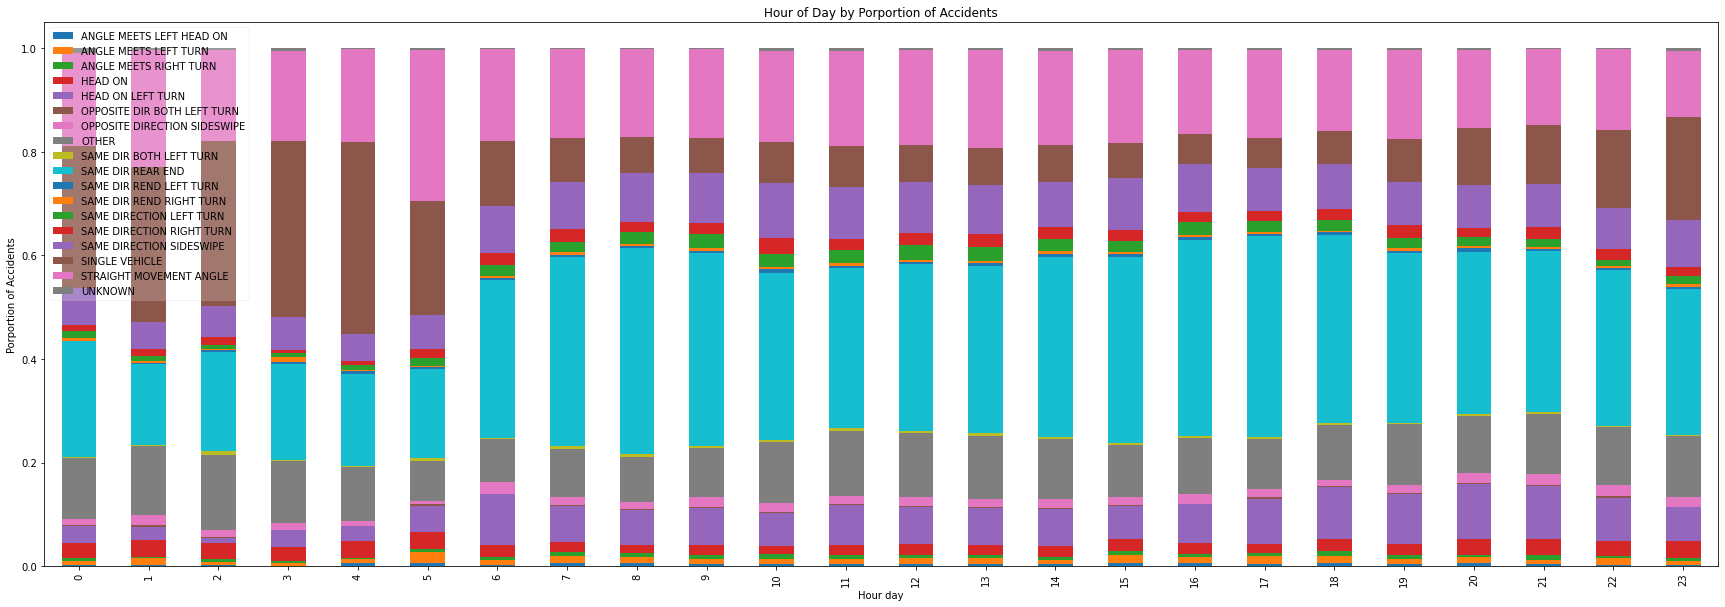

In [ ]:
pd.crosstab(df1['hour'], df1['Collision Type'], normalize= 'index').plot.bar(stacked= True, figsize= (30,10))
plt.legend(framealpha= 0.2)
plt.xlabel('Hour day')
plt.ylabel('Proportion of Accidents')
plt.title('Hour of Day by Proportion of Accidents');

In our exploration, we found two peaks in the data while plotting.

Next, we thought about looking for the collision types by the hour at the peak time.

Using the graph, we found that there are more rear-end collisions at the 2 peaks which are the busiest hours.
When we normalized the graph, we found that there is more probability of accidents while making a left turn from 12 AM to 5 AM.
Now, our curiosity is to look into why these left-turn accidents are happening.

Now, we only want to focus on the most prevalent data. We will remove the data which represents only a small portion of the total data, to get a clearer picture.

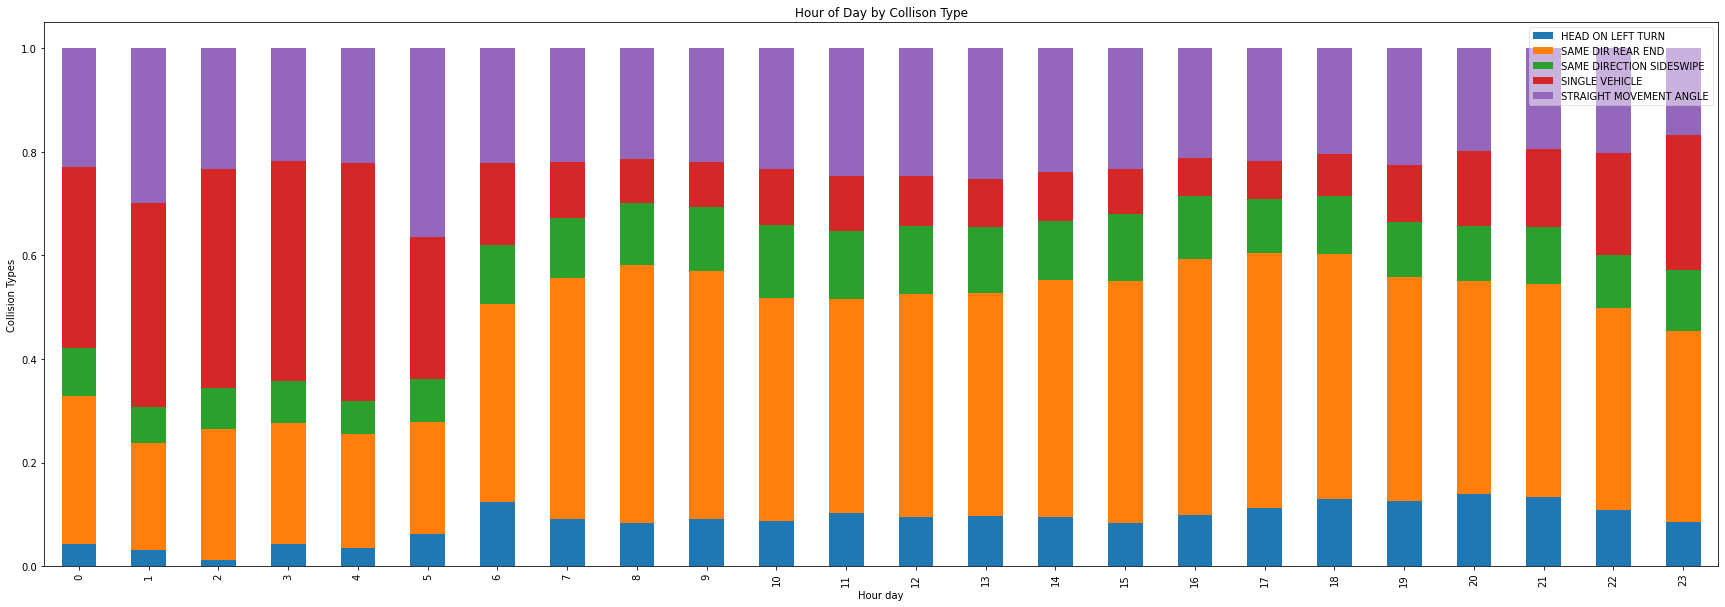

In [ ]:
df_Coll= df1[(df1['Collision Type'] == 'SAME DIR REAR END') | (df1['Collision Type'] == 'SINGLE VEHICLE') | (df1['Collision Type'] == 'STRAIGHT MOVEMENT ANGLE') | (df1['Collision Type'] == 'HEAD ON LEFT TURN') | (df1['Collision Type'] == 'SAME DIRECTION SIDESWIPE')]
pd.crosstab(df_Coll['hour'], df_Coll['Collision Type'], normalize= 'index').plot.bar(stacked= True, figsize= (30,10))#clean up collision type values, include normalize and regular graphs
plt.legend(framealpha= 0.5)
plt.title('Hour of Day by Collison Type')
plt.xlabel('Hour day')
plt.ylabel('Collision Types');

Why are single vehicles the highest number of accidents at the hours between of 12am and 5am? We suspect this is related to subatance abuse. We are going to look more into this now.

Below is the plot comparing hour of day and Driver substance abuse. The plot is normalized in order to depict the porportion of Driver Substance abuse during that hour.

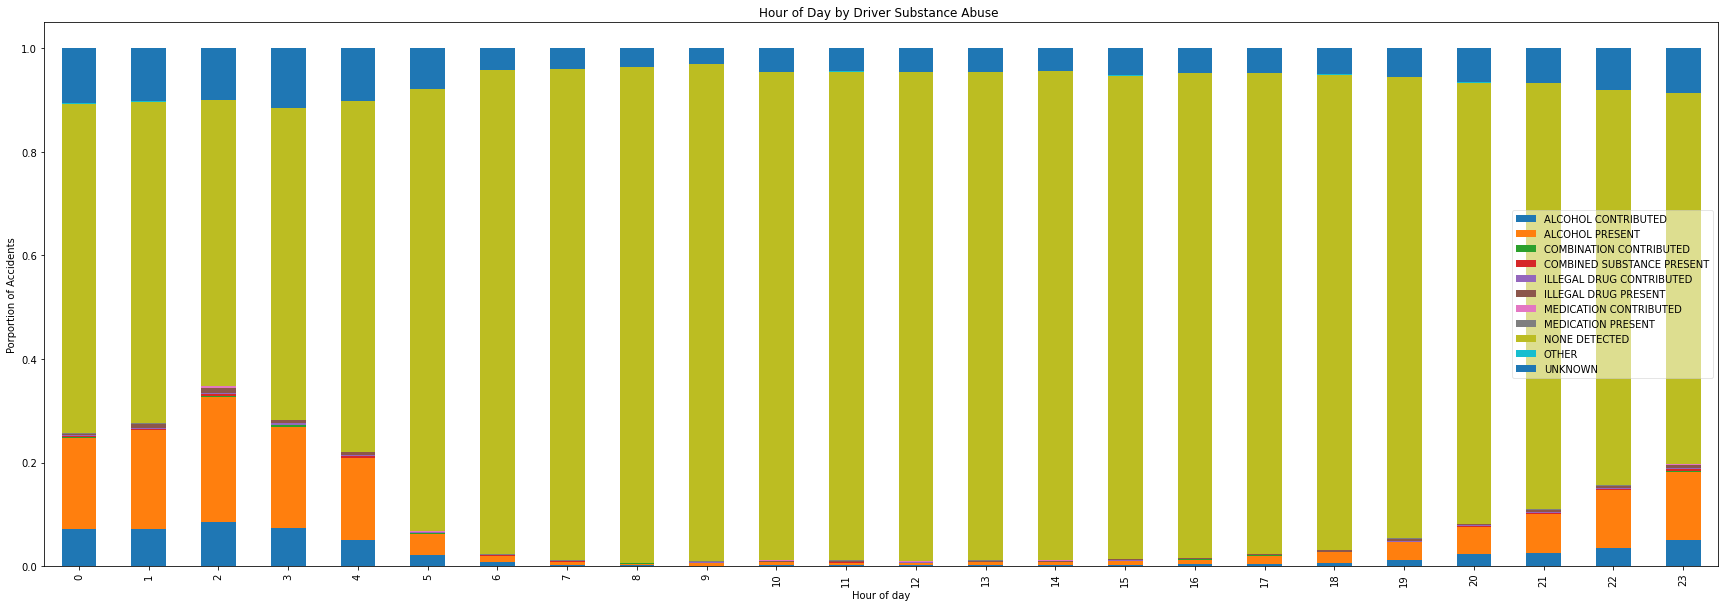

In [ ]:
pd.crosstab(df_Coll['hour'], df_Coll['Driver Substance Abuse'], normalize= 'index').plot.bar(stacked= True, figsize= (30,10))
plt.legend(framealpha= 0.5)
plt.title('Hour of Day by Driver Substance Abuse ')
plt.xlabel('Hour of day')
plt.ylabel('Proportion of Accidents');

In the graph above, there is a lot of insignificant data compared to the most prevalent data values. In the graph below, we have combined all alcohol related values into a single value called 'Alcohol related'. We have also group all insignificant data into the 'Other' group. We are going to leave all 'Unknown' values as is, since we do not know what exactly they represent.

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


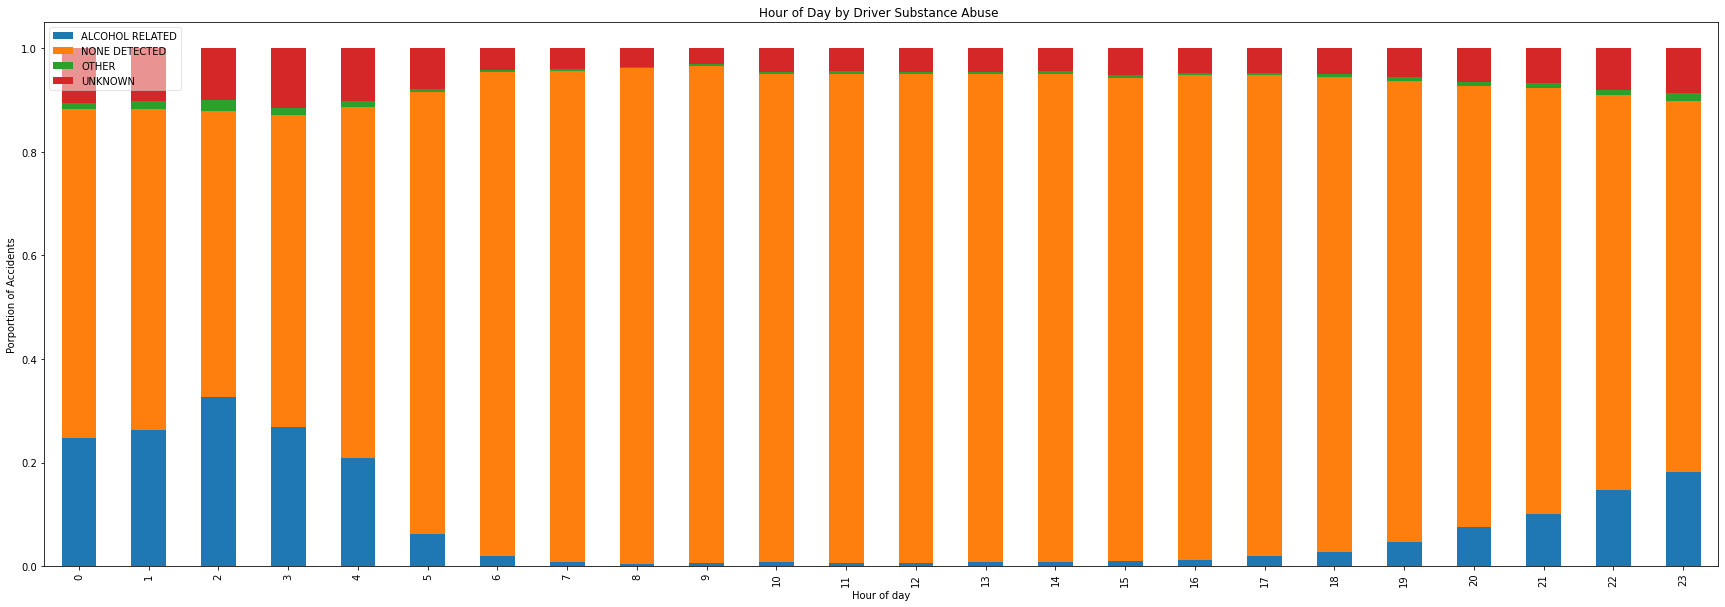

In [ ]:
df_Coll.replace({'ALCOHOL CONTRIBUTED': 'ALCOHOL RELATED', 'ALCOHOL PRESENT': 'ALCOHOL RELATED', 'COMBINATION CONTRIBUTED': 'OTHER', 'COMBINED SUBSTANCE PRESENT': 'OTHER', 'ILLEGAL DRUG CONTRIBUTED': 'OTHER', 'MEDICATION CONTRIBUTED': 'OTHER', 'MEDICATION PRESENT': 'OTHER', 'ILLEGAL DRUG PRESENT': 'OTHER'}, inplace= True)
pd.crosstab(df_Coll['hour'], df_Coll['Driver Substance Abuse'], normalize= 'index').plot.bar(stacked= True, figsize= (30,10))
plt.legend(framealpha= 0.5)
plt.title('Hour of Day by Driver Substance Abuse ')
plt.xlabel('Hour of day')
plt.ylabel('Proportion of Accidents');

We can see that the data is dominated by the 'None Present' values. The more important aspect to point out is that alcohol related accidents occur more often between the hours of 7PM-5AM . If we compare the graphs 'Hour by Driver Substance Abuse' and 'Hour by Collision Type', we can see a trend between 'Single Vehicle' accidents and alcohol related accidents between the hours of 12AM-5AM. 

Based on this information, we can say that single vehicle accidents may be influenced by the increase of alcohol related accidents at those hours. 

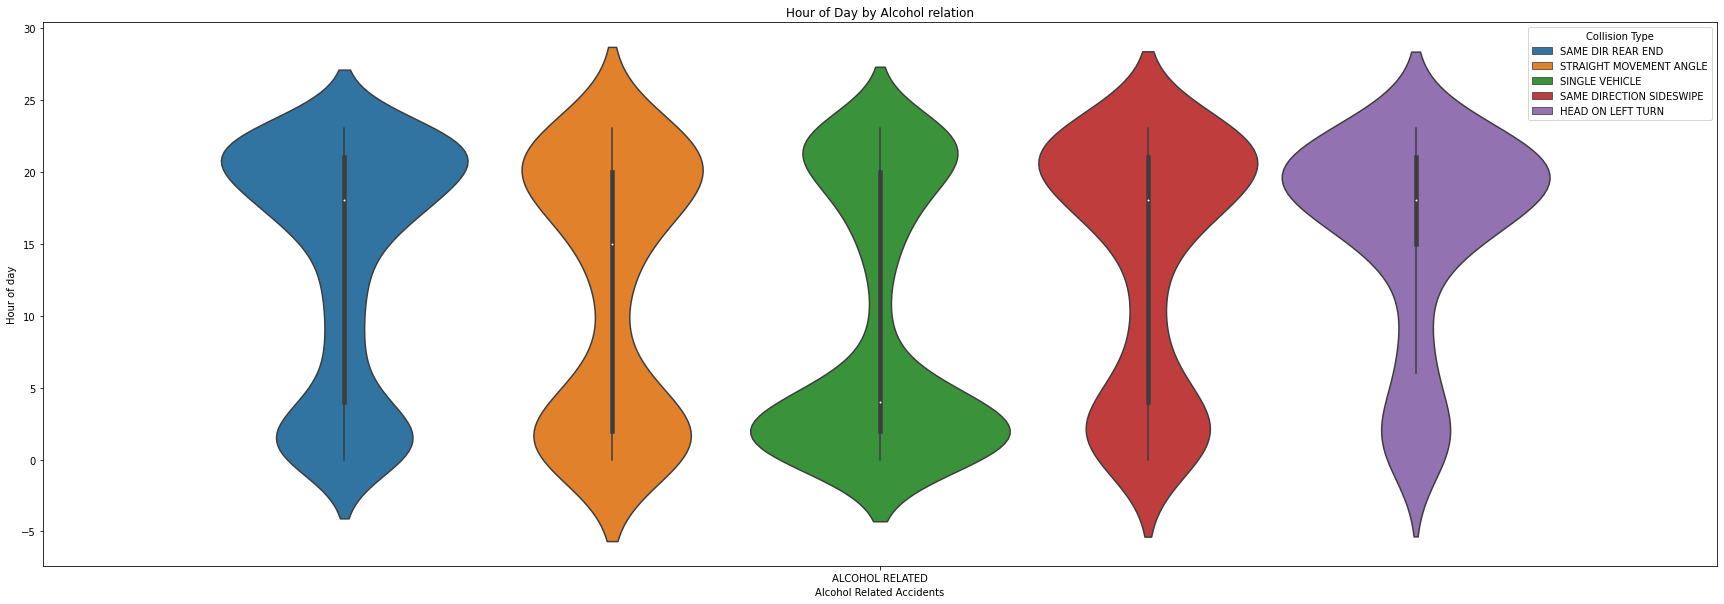

In [ ]:
df_Alcohol= df_Coll[(df_Coll['Driver Substance Abuse'] == 'ALCOHOL RELATED')]
plt.figure(figsize=(30,10))
sns.violinplot(x='Driver Substance Abuse', y='hour', hue= 'Collision Type', data= df_Alcohol)
plt.title('Hour of Day by Alcohol relation')
plt.xlabel('Alcohol Related Accidents')
plt.ylabel('Hour of day');

We used this Violin plot to prove our hypothesis that single vehicle  accidents may be influenced by the increase of alcohol related accidents bewteen the hours 7PM and 5AM. Here we can see that for the green plot we have an increase of Alcohol related accidents during the times where signle vehicle accidents are most prevalent. 


## Case 2 - Does injury probability depend on vehicle year or damage extent? 

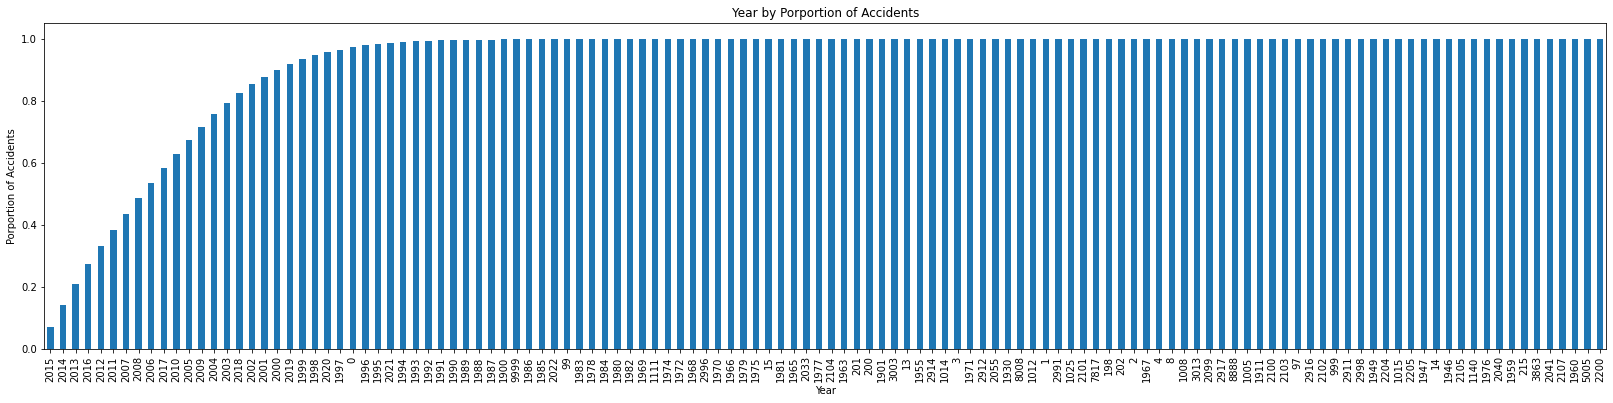

In [ ]:
plt.figure(figsize=(28,6))
df1['Vehicle Year'].value_counts(normalize=True).cumsum().plot.bar()
plt.ylabel('Proportion of Accidents')
plt.xlabel('Year')
plt.title('Year by Proportion of Accidents');

We plotted a graph to look at the top 95 percent of the data in the column 'Vehicle Year'.

There is an absurd value 0, that we don't know about, which we are not going to include.

In [ ]:
df_veh_yr = df1[(df1['Vehicle Year']>1994) & (df1['Vehicle Year']<2022)]

In order to focus on whether or not someone was injured, we want to simplify the values in 'Injury Severity' to injured and not injured.

In [ ]:
df_veh_yr['Injury Severity']= (df_veh_yr['Injury Severity']!= 'NO APPARENT INJURY')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Now we are plotting the 'Vehicle Damage Extent' and whether or not someone was injured.

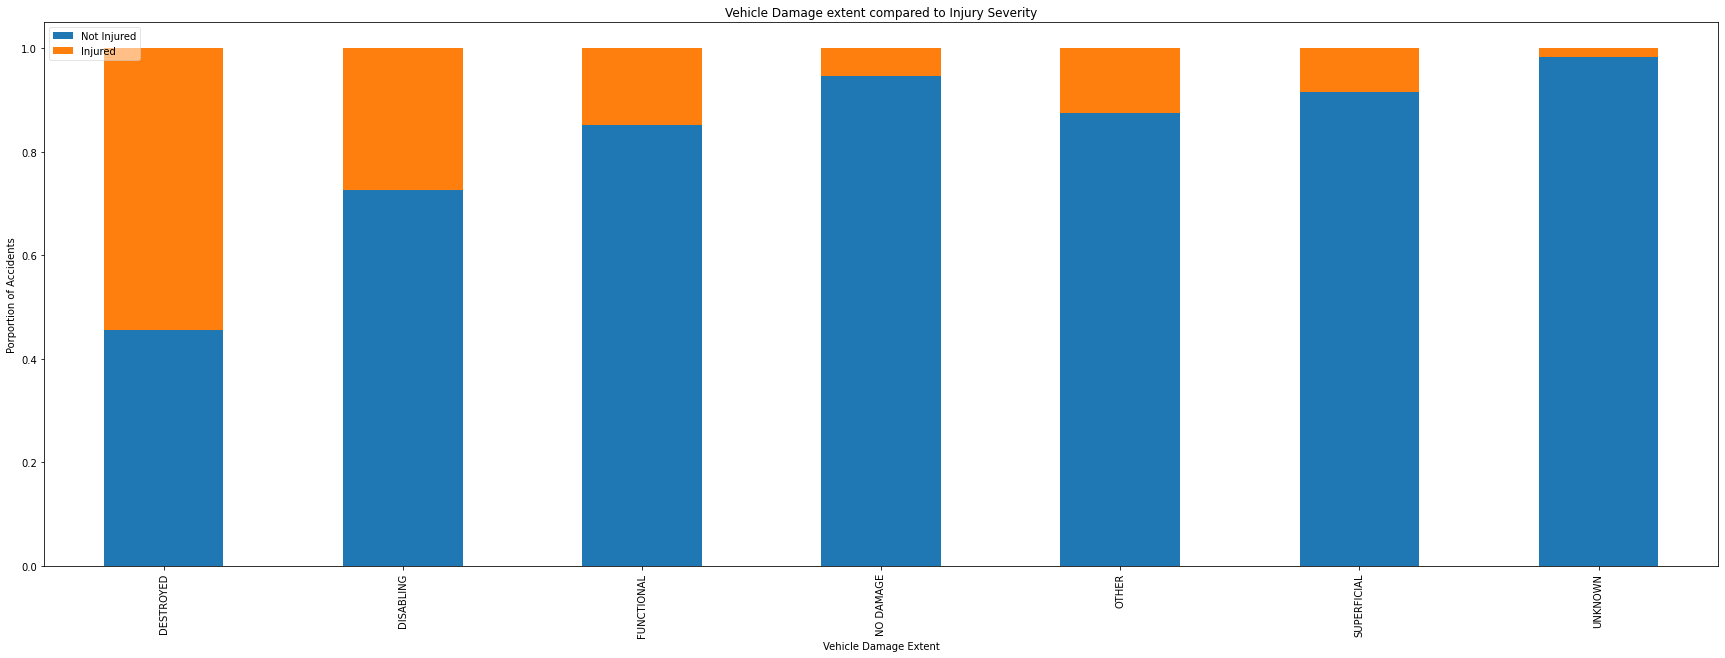

In [ ]:
pd.crosstab(df_veh_yr['Vehicle Damage Extent'], df_veh_yr['Injury Severity'], normalize= 'index').plot.bar(stacked= True, figsize= (30,10))
plt.legend(labels=['Not Injured','Injured'],framealpha= 0.5)
plt.title('Vehicle Damage extent compared to Injury Severity')
plt.ylabel('Proportion of Accidents')
plt.xlabel('Vehicle Damage Extent');

Based on the graph above, we can see that when vehicles are destroyed theres a 55% probability of being injured. For the rest of the damage extent values, the probaility of injury is less than 25%. So we could say that unless the vehicle is destroyed, the probability of being injured is low. 

This leads us to wonder, if the vehicle year has more of an effect on the injury probability.

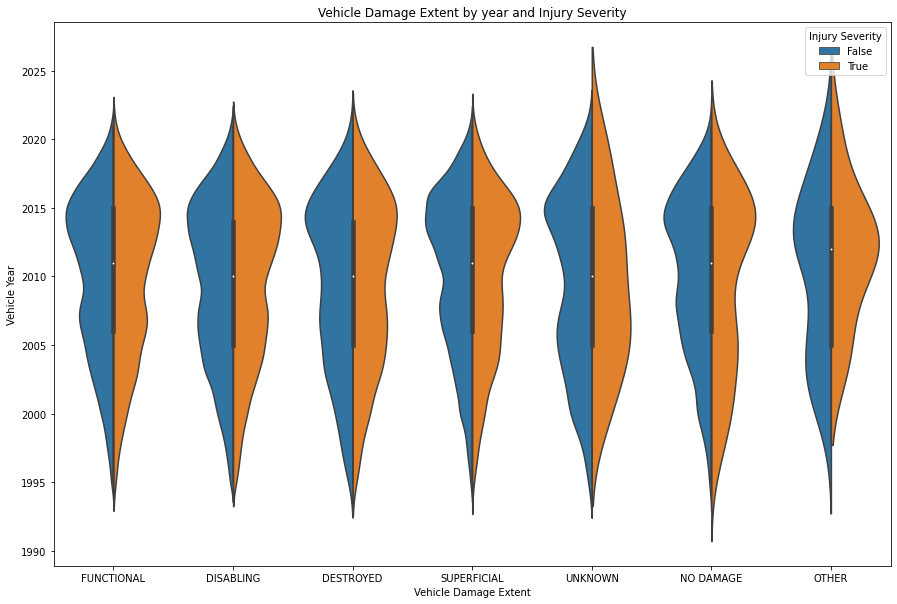

In [ ]:
plt.figure(figsize=(15,10))
sns.violinplot(x='Vehicle Damage Extent',y='Vehicle Year', hue='Injury Severity', split=True, data= df_veh_yr)
plt.title('Vehicle Damage Extent by year and Injury Severity')
plt.ylabel('Vehicle Year')
plt.xlabel('Vehicle Damage Extent');

In the the plot above, the blue represents no injury and the orange represents injury.

Based on this plot, we can say that vehicle year does not have any major influence on whether or not injury occurs.


## Case 3 - Do roads with the highest number of accidents have lower amounts of traffic control?


In [ ]:
df_Road= df1[(df1['Road Name'] == 'GEORGIA AVE') | (df1['Road Name'] == 'NEW HAMPSHIRE AVE') | (df1['Road Name'] == 'FREDERICK RD') | (df1['Road Name'] == 'ROCKVILLE PIKE') | (df1['Road Name'] == 'CONNECTICUT AVE') | (df1['Road Name'] == 'VEIRS MILL RD') | (df1['Road Name'] == 'COLUMBIA PIKE') | (df1['Road Name'] == 'RANDOLPH RD') | (df1['Road Name'] == 'COLESVILLE RD') | (df1['Road Name'] == 'SHADY GROVE RD')]

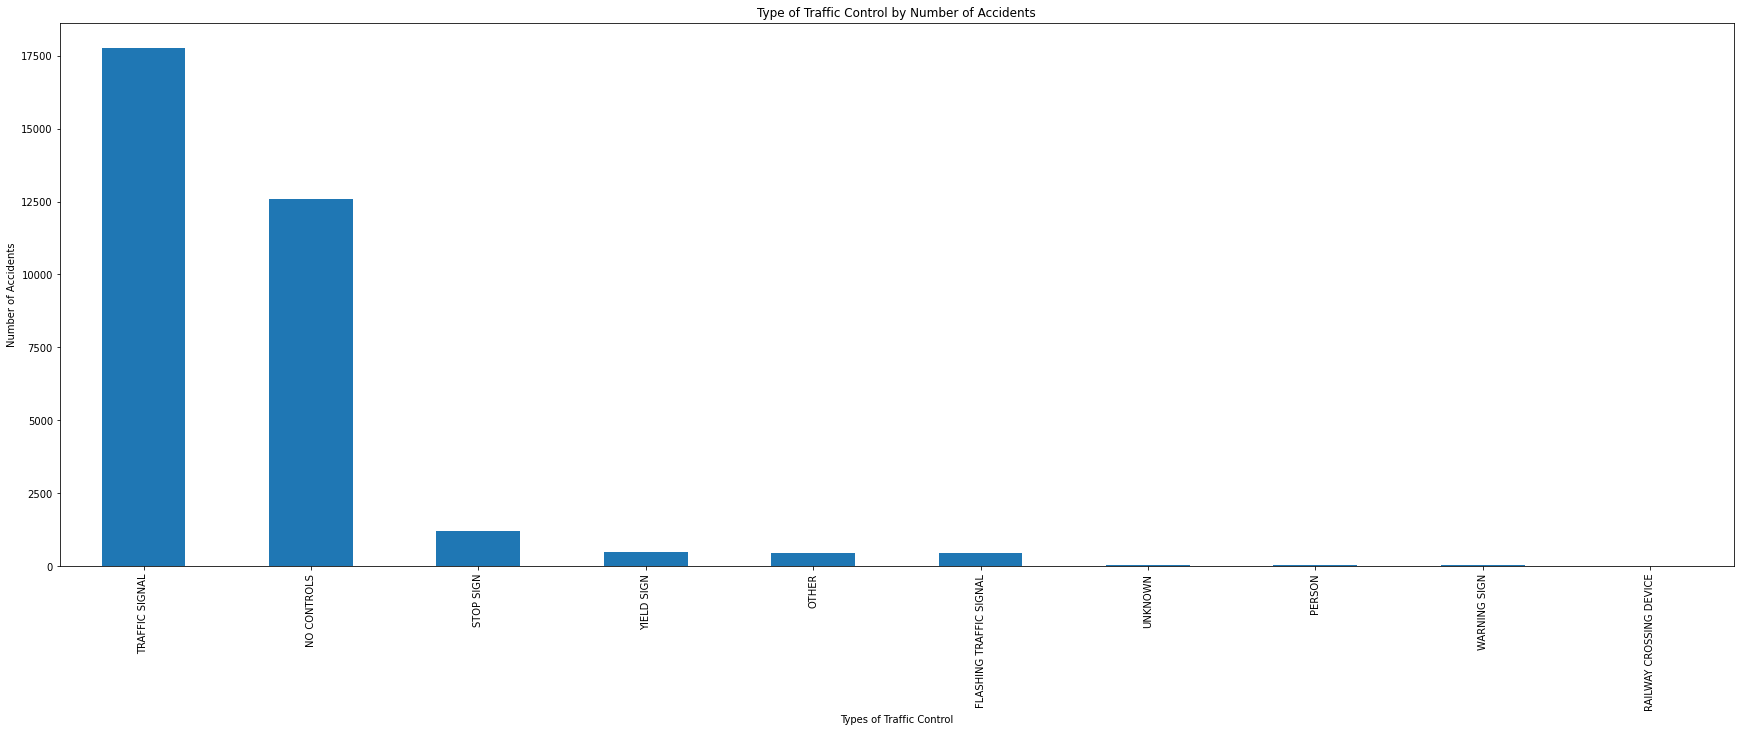

In [ ]:
plt.figure(figsize= (30,10))
df_Road['Traffic Control'].value_counts().plot.bar()
plt.title('Type of Traffic Control by Number of Accidents')
plt.ylabel('Number of Accidents')
plt.xlabel('Types of Traffic Control');

For the graph above, we focused the data on 'Road Name' to only the most accident prone roads. In doing this, we have found that despite the most accident prone roads having traffic signals, they still incur a large amount of accidents.

After assessing the situation, we wanted to look at the most popular roads to find out if the traffic controls on those specific roads influence the percentage of accidents. We define traffic contols as stoplights, stop signs, etc.  

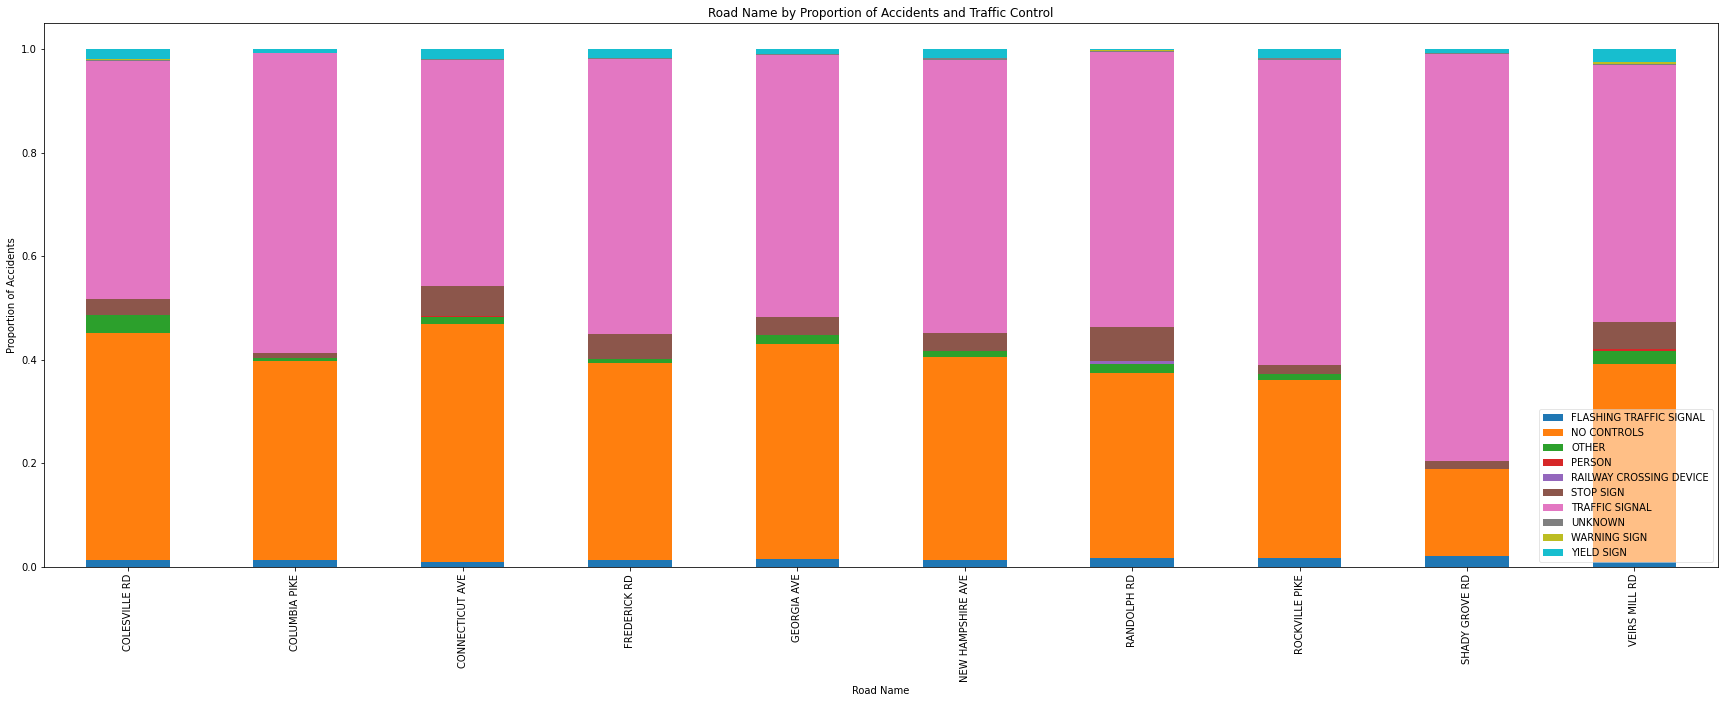

In [ ]:
pd.crosstab(df_Road['Road Name'], df_Road['Traffic Control'],normalize='index').plot.bar(stacked= True, figsize= (30,10))
plt.legend(framealpha= 0.5)
plt.title('Road Name by Proportion of Accidents and Traffic Control')
plt.ylabel('Proportion of Accidents')
plt.xlabel('Road Name');

Despite these road having a higher proportion of traffic controls than no controls, these roads are still the most accident prone roads. Shady Grove is a perfect example of this situation. It has an overwhelmingly higher percentage of traffic controls and yet it is in the top 10 most accident prone roads.


## Case 4: Do Vehicle Body Types Incur Certain Collisions more than others?

Below we have graphed the top five most occuring values in Vehicle Body Type with Collision type. We are hoping to find a relationship between these two features.

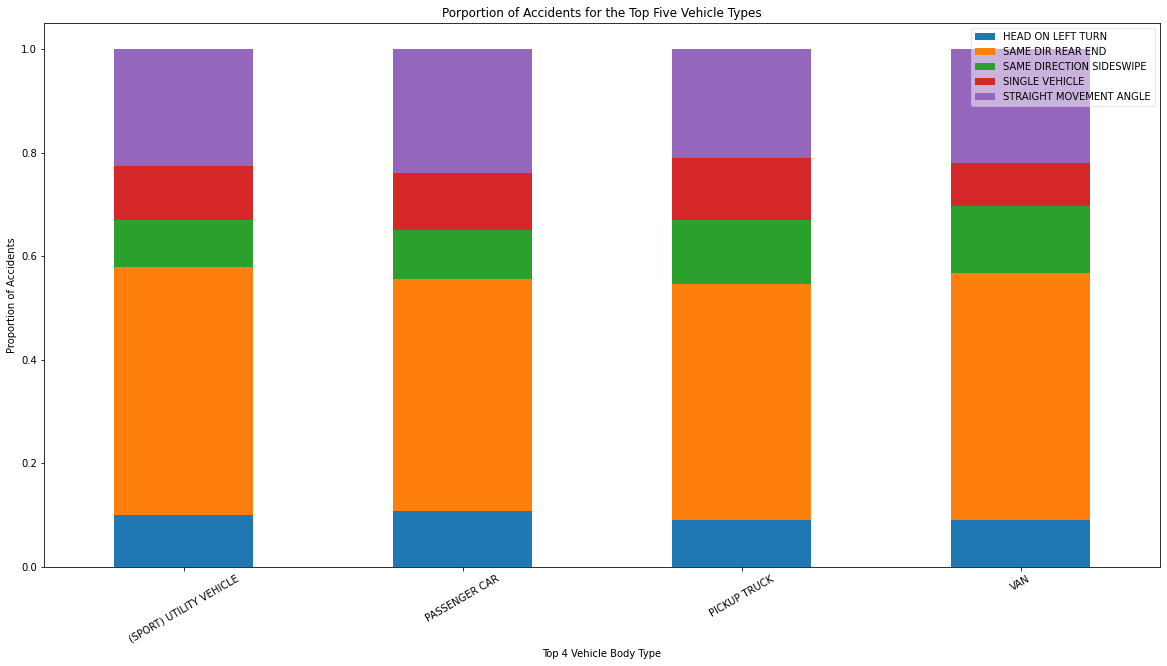

In [ ]:
df_Coll_Body = df_Coll[ (df_Coll['Vehicle Body Type']== 'PASSENGER CAR') | (df_Coll['Vehicle Body Type']== '(SPORT) UTILITY VEHICLE') | (df_Coll['Vehicle Body Type']== 'PICKUP TRUCK') | (df_Coll['Vehicle Body Type']== 'VAN') |(df_Coll['Vehicle Body Type']== 'VAN')]
pd.crosstab(df_Coll_Body['Vehicle Body Type'], df_Coll_Body['Collision Type'], normalize= 'index').plot.bar(stacked= True, figsize= (20,10))
plt.legend(framealpha= 0.5)
plt.xticks(rotation= 30)
plt.title('Porportion of Accidents for the Top Five Vehicle Types')
plt.ylabel('Proportion of Accidents')
plt.xlabel('Top 4 Vehicle Body Type');

Based on the graph above, we would conclude that, despite the different vehicle body types there is no difference in the types of collisions that occur. This lead us to our next question of whether or not the hour of day has any effect of the types of collision that occur based on Vehicle Body Type.

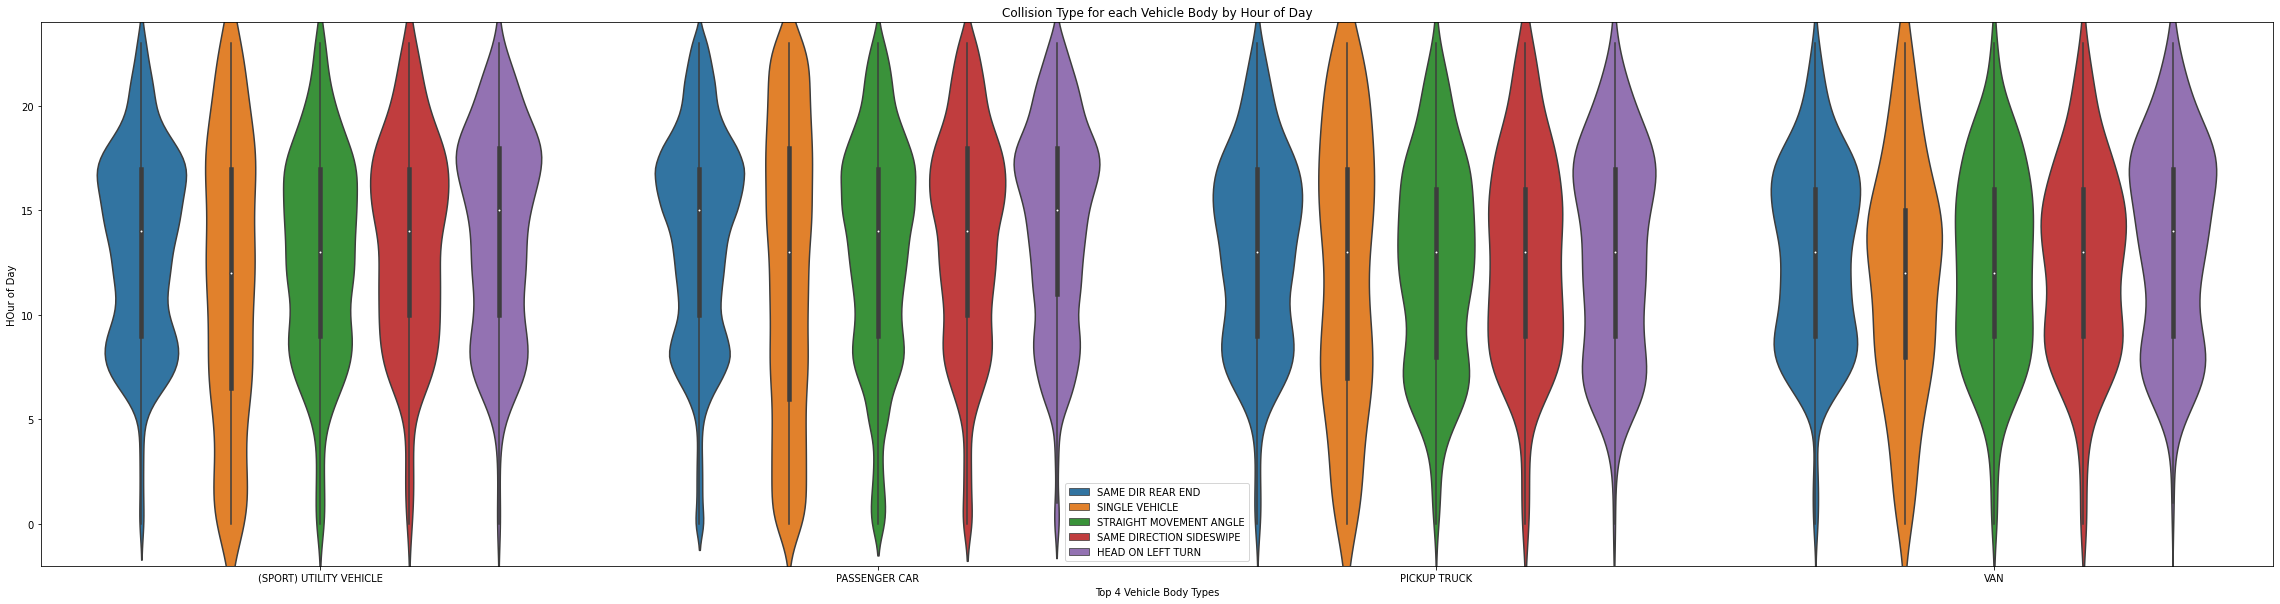

In [ ]:
plt.figure(figsize=(40,10))
sns.violinplot(x='Vehicle Body Type', y='hour', hue='Collision Type', data= df_Coll_Body)
plt.legend(loc='lower center')
plt.title('Collision Type for each Vehicle Body by Hour of Day')
plt.ylim((-2,24))
plt.ylabel('HOur of Day')
plt.xlabel('Top 4 Vehicle Body Types');

When comparing plots for a single Body type, we were hoping to see a major difference between collision types for each vehicle body type. But we concluded that there is no major difference.



#Conclusion: 

>In this report we wanted to investigate four different questions. In our investigation into case 1, we concluded that during the hours between 12am-5am 'single vehicle' accidents were more likely to be alcohol related. In case 2, we found that 'injury severity' is not majorly influenced by 'vehicle damage extent' or 'vehicle year'. In our third case, we found that despite these road having a higher proportion of traffic controls than no controls, these roads are still the most accident prone roads. For our fourth, case we determined that is no major difference between collision types, for the each of the different vehicle body type. 

>We encountered many issues, the most prevalent being coming to very ordinary conclusions. We expected to see better results to the questions we were asking. Also, the fact that this was our first data science report, we found it difficult to frame our report. In particular, organizing the data cleaning and preprocessing section created a lot of problems. It took us a long time to figure out what exactly to include in that section.      


